#Exe. 1 First upload the winequality-white.csv. It is available in the platform. Then upload it in the panda data frame format with ; separator.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving winequality-white.csv to winequality-white.csv


In [ ]:
import pandas as pd
import io
wine = pd.read_csv(io.BytesIO( uploaded ['winequality-white.csv']) ,sep =';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Shuffle the wine data set using sklearn.utils.shuffle(). For the sake
of simplicity for this exercise, get only the first 1000 elements of the wine
dataframe.

In [ ]:
from sklearn.utils import shuffle
wine=shuffle(wine)
wine=wine[:1000]
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3911,7.2,0.23,0.82,1.3,0.149,70.0,109.0,0.99304,2.93,0.42,9.2,6
952,6.5,0.17,0.33,1.4,0.028,14.0,99.0,0.99280,3.23,0.55,10.1,6
1560,7.8,0.30,0.74,1.8,0.033,33.0,156.0,0.99100,3.29,0.52,12.8,6
1671,7.0,0.35,0.30,6.5,0.028,27.0,87.0,0.99360,3.40,0.42,11.4,7
4354,6.4,0.31,0.27,7.4,0.049,48.0,169.0,0.99323,3.27,0.45,11.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
358,10.0,0.20,0.39,1.4,0.050,19.0,152.0,0.99400,3.00,0.42,10.4,6
3586,5.8,0.28,0.28,4.2,0.044,52.0,158.0,0.99200,3.35,0.44,10.7,7
1366,7.0,0.14,0.41,0.9,0.037,22.0,95.0,0.99140,3.25,0.43,10.9,6
121,7.8,0.24,0.32,12.2,0.054,42.0,138.0,0.99840,3.01,0.54,8.8,5


#Exe. 2 By using the following code, scatter plot your entire recovered dataset.

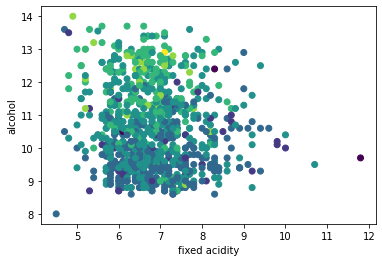

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( wine ['fixed acidity'],wine ['alcohol'],c= wine['quality'],cmap ='viridis')
plt.xlabel("fixed acidity")
plt.ylabel("alcohol")
plt.show()


#Exe. 3 Using the iloc in panda dataframe get the first 11 columns of wine
dataset as X and the final column as y. Then convert the dataframe to matrix
using X.values and y.values.

In [ ]:
import numpy as np
X=wine.iloc[:,:11]
y=wine.iloc[:,-1:]
X=X.values
y=y.values
y.shape

(1000, 1)

Finally convert y values to the categorical types using the following code i.e. for
the y labels between 0 and 10, 2 should be represented as a 10 dimensional vector
of 0 and 1s as: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]. This is called one hot encoding of the
target variable

In [ ]:
from keras.utils import to_categorical
y = to_categorical(y)
print(y)
y.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(1000, 10)

#Exe. 4 Divide the data set to train and test set by selecting the first 80% elements as train and the rest as the test set.


In [ ]:
n_train = int(0.8*len(X))
trainX , testX = X [: n_train , :] , X[ n_train :, :]
trainy , testy = y [: n_train ], y[ n_train :]

check the trainX, testX, trainy, testy shapes, and see if they are coherent

In [ ]:
trainX.shape, testX.shape, trainy.shape, testy.shape

((800, 11), (200, 11), (800, 10), (200, 10))

#Exe. 5 Define a simple multi layer perceptron (MLP) model
that expects 11 input variables from the wine dataset, has a single hidden layer with 50 nodes,
and an output layer with 10 nodes to predict the probability for each of the ten
classes. Nodes in the hidden layer will use the rectified linear activation function (ReLU), whereas nodes in the output layer will use the softmax activation
function.

In [ ]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(50, input_dim=11, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])


#Exe. 6 using the stochastic gradient descent optimizer and a learning rate be specified by you. The model will be trained to minimize cross entropy.


In [ ]:
from keras.optimizers import SGD
# compile model
lrate = 0.01
model.compile ( loss ='categorical_crossentropy', optimizer = keras.optimizers.SGD (learning_rate = lrate ) , metrics =[ 'accuracy'])

#Exe. 7 Fit the model for 200 training epochs, found with a little trial and error, and the test set will be used as the validation dataset so we can get an idea ofthe generalization error of the model during training.

In [ ]:
# fit model
history = model.fit( trainX , trainy , validation_data =( testX , testy ) ,epochs =200 , verbose =0)


#Exe. 8 Once fit, we will plot the accuracy of the model on the train and test sets over the training epochs using the following code:


Text(0.5, 1.0, 'lrate =0.01')

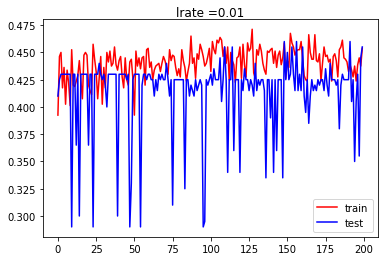

In [ ]:
# plot learning curves
plt.plot( history.history['accuracy'], label ='train', color = 'r')
plt.plot( history.history ['val_accuracy'], label ='test', color = 'b')
plt.legend()
plt.title ('lrate ='+ str(lrate) , pad = -50)

#Exe. 9 write a function namely fit_model(trainX, trainy, testX, testy,lrate) 
that ties the exercises 5 to 8 together. In general, it will fit a model
and plot its performance given the train and test datasets as well as a specific
learning rate to evaluate

In [ ]:
def fit_model(trainX, trainy, testX, testy,lrate):
  # create model
  model = keras.Sequential([
    keras.layers.Dense(50, input_dim=11, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
  ])

  # compile model
  model.compile(loss ='categorical_crossentropy', optimizer = keras.optimizers.SGD (learning_rate = lrate ) , metrics =[ 'accuracy'])
  # fit model
  history = model.fit( trainX , trainy , validation_data =( testX , testy ) ,epochs =200 , verbose =0)
  # plot learning curves
  plt.plot( history.history['accuracy'], label ='train', color = 'r')
  plt.plot( history.history ['val_accuracy'], label ='test', color = 'b')
  #plt.legend()
  plt.title ('lrate ='+ str(lrate) , pad = -50)



#Exe. 10 In this exercise, we evaluate learning rates on a logarithmic scale 
from 1E − 0 (1.0) to 1E − 7 (0.000001) and create line plots for each learning rate by calling the fit model() function

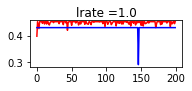

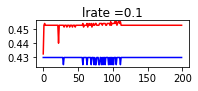

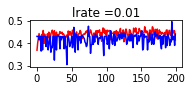

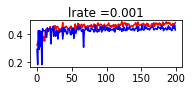

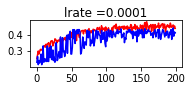

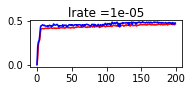

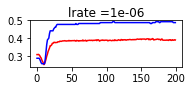

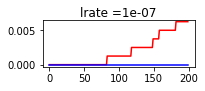

In [ ]:
# create learning curves for different learning rates
learning_rates = [1E-0 , 1E-1 , 1E-2 , 1E-3 , 1E-4 , 1E-5 , 1E-6 , 1E-7]
for i in range ( len ( learning_rates ) ):
  # determine the plot number
  plot_no = 420 + (i +1)
  plt.subplot( plot_no )
  # fit model and plot learning curves for a learning rate
  fit_model ( trainX , trainy , testX , testy , learning_rates [i])
  # show learning curves
  plt.show ()

We can observe that the learning rate=0.001 giving more accuracy for both test and train set. Test accuracy is slightly lesser than train accurracy

#Exe. 11 choose the best learning rate from the previous exercise which converged to a reasonable solution. Modify the fit model(trainX, trainy,testX, testy, momentum))
function to take a “momentum” argument instead
of a learning rate argument, that can be used in the configuration of the SGD
class and reported on the resulting plot. And keep the learning rate as your
best parameter of the exe. 10

In [ ]:
def fit_model(trainX, trainy, testX, testy,momentum):
  # create model
  model = keras.Sequential([
    keras.layers.Dense(50, input_dim=11, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
  ])
  lrate=0.001
  # compile model
  model.compile(loss ='categorical_crossentropy', optimizer = keras.optimizers.SGD(momentum= momentum) , metrics =[ 'accuracy'])
  # fit model
  history = model.fit( trainX , trainy , validation_data =( testX , testy ) ,epochs =200 , verbose =0)
  # plot learning curves
  plt.plot( history.history['accuracy'], label ='train', color = 'r')
  plt.plot( history.history ['val_accuracy'], label ='test', color = 'b')
  #plt.legend()
  plt.title ('momentum ='+ str(momentum) , pad = -50)



#Exe. 12 It is common to use momentum values close to 1.0, such as 0.9 and 0.99.
Demonstrate the dynamics of the model without momentum compared to the model with momentum values of 0.5 and the higher momentum values. Similar to Exe. 10, demonstrate different accuracy changing vs. epochs graphs on
various momentum values as momentums = [0.0, 0.5, 0.9, 0.99] and using
the modified fit_model() function.


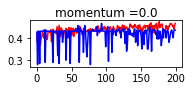

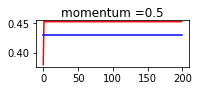

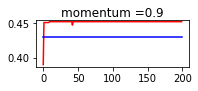

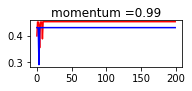

In [ ]:
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range ( len ( momentums ) ):
  # determine the plot number
  plot_no = 420 + (i +1)
  plt.subplot( plot_no )
  # fit model and plot learning curves for a learning rate
  fit_model ( trainX , trainy , testX , testy , momentums[i])
  # show learning curves
  plt.show ()

We can see that learning curves are stable for momentum 0.5,0.9 and 0.99. And, momentum=0.99 is showing more accuracy on both test and train set and there is a slight difference between the two.

#Exe. 13 Implement a learning rate decay function using the following formula:
initialrate × (1.0/(1.0 + decay × iteration))
for three input variables initial rate, decay and iteration. This function
will be used to calculate the learning rate over multiple updates with different
decay values. Run the following code:

In [ ]:
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
	return initial_lrate * (1.0 / (1.0 + decay * iteration))


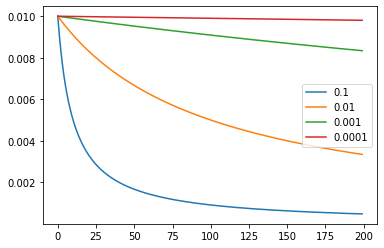

In [ ]:
decays = [1E-1 , 1E-2 , 1E-3 , 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays :
  # calculate learning rates for updates
  lrates = [decay_lrate ( lrate , decay , i) for i in range ( n_updates )]
  # plot result
  plt.plot (lrates , label = str ( decay ))
plt.legend ()
plt.show ()


#Exe. 14 similar to Exe. 11, modify the fit model() function to take a ’decay’ argument
which can be used to configure decay for SGD class i.e.
keras.optimizers.SGD(learning rate= , decay= )

In [ ]:
def fit_model(trainX, trainy, testX, testy,decay):
  # create model
  model = keras.Sequential([
    keras.layers.Dense(50, input_dim=11, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
  ])
  lrate=0.001
  # compile model
  model.compile(loss ='categorical_crossentropy', optimizer = keras.optimizers.SGD(learning_rate= lrate , decay=decay) , metrics =[ 'accuracy'])
  # fit model
  history = model.fit( trainX , trainy , validation_data =( testX , testy ) ,epochs =200 , verbose =0)
  # plot learning curves
  plt.plot( history.history['accuracy'], label ='train', color = 'r')
  plt.plot( history.history ['val_accuracy'], label ='test', color = 'b')
  #plt.legend()
  plt.title ('decay ='+ str(decay) , pad = -50)

#Exe. 15 Similar to exe. 10 and 12, evaluate the accuracy changing of train and test sets
 for [1E − 1, 1E − 2, 1E − 3, 1E − 4] decay values and their effect on
model accuracy.

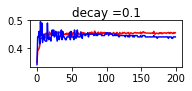

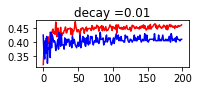

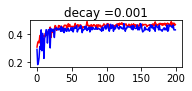

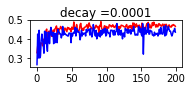

In [ ]:
# create learning curves for different decays
decays = [1E-1 , 1E-2 , 1E-3 , 1E-4]
for i in range ( len ( decays ) ):
  # determine the plot number
  plot_no = 420 + (i +1)
  plt.subplot( plot_no )
  # fit model and plot learning curves for a learning rate
  fit_model( trainX , trainy , testX , testy , decays[i])
  # show learning curves
  plt.show ()

# Effect of Adaptive Learning Rates


#Exe. 16 Update the fit model(trainX, trainy, testX, testy, optimizer)
function to take the name of an optimization algorithm to evaluate, which can
be specified to the “optimizer” argument when the MLP model is compiled.
The default parameters for each method will then be used

In [ ]:
def fit_model(trainX, trainy, testX, testy,optimizer):
  # create model
  model = keras.Sequential([
    keras.layers.Dense(50, input_dim=11, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
  ])
  lrate=0.001
  # compile model
  model.compile(loss ='categorical_crossentropy', optimizer = optimizer , metrics =[ 'accuracy'])
  # fit model
  history = model.fit( trainX , trainy , validation_data =( testX , testy ) ,epochs =200 , verbose =0)
  # plot learning curves
  plt.plot( history.history['accuracy'], label ='train', color = 'r')
  plt.plot( history.history ['val_accuracy'], label ='test', color = 'b')
  #plt.legend()
  plt.title ('optimizer ='+ str(optimizer) , pad = -50)

#Exe. 17 Similar to exe. 10, 12 and 15 explore the three methods of RMSprop, AdaGrad and Adam
and compare their behavior to simple stochastic gradient
descent with a static learning rate.

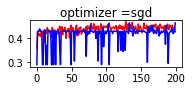

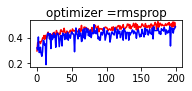

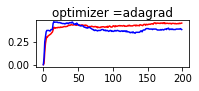

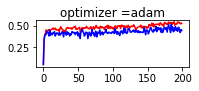

In [ ]:
# create learning curves for different optimizers
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range ( len ( optimizers ) ):
  # determine the plot number
  plot_no = 420 + (i +1)
  plt.subplot( plot_no )
  # fit model and plot learning curves for a learning rate
  fit_model( trainX , trainy , testX , testy , optimizers[i])
  # show learning curves
  plt.show ()

We can observe that models with optimizers adagrad and adam have learnt with in 50 epochs. Model with optimizer=adagrad is more stable.